In [5]:
import matplotlib.pyplot as plt
import os
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [6]:
ROOT_DIR = os.path.dirname(os.path.abspath("."))

# Read train/test data

x_train = pd.read_csv(f"{ROOT_DIR}/data/x_train.csv")
y_train = pd.read_csv(f"{ROOT_DIR}/data/y_train.csv")

x_test = pd.read_csv(f"{ROOT_DIR}/data/x_test.csv")
y_test = pd.read_csv(f"{ROOT_DIR}/data/y_test.csv")

# input_data
input_data = pd.read_csv(f"{ROOT_DIR}/data/input_data.csv")

/var/folders/06/vdx5d26x60j4tt4cqzfnj7nr0000gn/T/ipykernel_13862/624625863.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  input_data = pd.read_csv(f"{ROOT_DIR}/data/input_data.csv")


In [11]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380965 entries, 0 to 380964
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   precipitationLast6Hours    40 non-null      float64
 1   visibility                 344491 non-null  float64
 2   barometricPressure         380866 non-null  float64
 3   windDirection              380746 non-null  float64
 4   relativeHumidity           380861 non-null  float64
 5   heatIndex                  14 non-null      float64
 6   rawMessage                 947 non-null     object 
 7   timestamp                  380965 non-null  object 
 8   maxTemperatureLast24Hours  0 non-null       float64
 9   elevation                  380965 non-null  int64  
 10  temperature                380865 non-null  float64
 11  minTemperatureLast24Hours  0 non-null       float64
 12  precipitationLastHour      46156 non-null   float64
 13  precipitationLast3Hours    47

In [3]:
y_train.value_counts()

textDescription    
Clear                  88176
Partly Cloudy          66873
Mostly Cloudy          41265
Fog/Mist               26764
Light Precipitation    24241
Haze                   12230
Precipitation           5897
Heavy Precipitation     1206
dtype: int64

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'dewpoint'}>,
        <AxesSubplot:title={'center':'windDirection'}>],
       [<AxesSubplot:title={'center':'windSpeed'}>,
        <AxesSubplot:title={'center':'barometricPressure'}>,
        <AxesSubplot:title={'center':'visibility'}>],
       [<AxesSubplot:title={'center':'seaLevelPressure'}>,
        <AxesSubplot:title={'center':'relativeHumidity'}>,
        <AxesSubplot:title={'center':'elevation'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

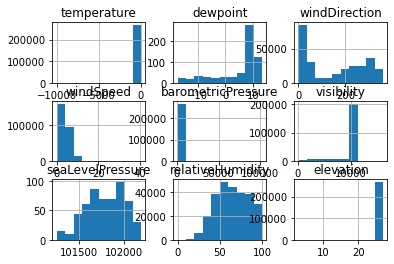

In [4]:
plt.subplots_adjust(left=0.8,
                    bottom=0.8, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)

x_train.hist()

In [7]:
# Convert categorical values to numeric
label_encoder = LabelEncoder()
input_data['textDescription'] = label_encoder.fit_transform(input_data['textDescription'])
  
# Create correlation matrix
corr_mat = input_data.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()
  
print(sorted_mat)

elevation           barometricPressure          -0.905584
barometricPressure  elevation                   -0.905584
relativeHumidity    visibility                  -0.488587
visibility          relativeHumidity            -0.488587
windGust            dewpoint                    -0.471911
                                                   ...   
dewPoint            elevation                         NaN
                    minTemperatureLast24Hours         NaN
                    dewpoint                          NaN
                    windChill                         NaN
                    seaLevelPressure                  NaN
Length: 361, dtype: float64


In [ ]:
# Train model
gnb = GaussianNB().fit(x_train, y_train.values.ravel())

# Predict 
gnb_predictions = gnb.predict(x_test)

# accuracy on x_test
accuracy = gnb.score(x_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

In [ ]:
# Formulate result dataframe
result = x_test.copy()
result['expected'] = y_test
result['predicted'] = gnb_predictions

In [ ]:
pd.set_option('display.max_rows', None)
result[result['expected'] != result['predicted']]

In [ ]:
cm